**Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
pd.set_option('display.max_columns',None)
plt.rcParams['figure.dpi']=80

In [2]:
df = pd.read_csv('/kaggle/input/shamiri-task/shamiri_imputed_dataset.csv')

# **4 a. Calculating Overall Mean Scores on the GAD**

In [3]:
df.loc[:, 'GAD1':'GAD7']

,GAD1,GAD2,GAD3,GAD4,GAD5,GAD6,GAD7
0,1,2,3,3,1,3,0
1,0,0,0,1,1,0,0
2,0,2,3,1,0,3,1
3,3,3,3,1,1,3,2
4,1,3,3,1,0,1,0
...,...,...,...,...,...,...,...
653,1,1,2,3,1,3,1
654,0,2,3,3,3,2,2
655,2,3,2,1,3,3,3
656,0,1,0,0,0,1,1


In [4]:
data = df.loc[:, 'GAD1':'GAD7']

In [5]:
data.shape

(658, 7)

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
GAD1,658.0,1.048632,1.011685,0.0,0.0,1.0,2.0,3.0
GAD2,658.0,1.319149,1.144758,0.0,0.0,1.0,2.0,3.0
GAD3,658.0,1.515198,1.134989,0.0,1.0,1.0,3.0,3.0
GAD4,658.0,0.998480,1.113771,0.0,0.0,1.0,2.0,3.0
GAD5,658.0,0.776596,1.005434,0.0,0.0,0.0,1.0,3.0
GAD6,658.0,1.203647,1.102585,0.0,0.0,1.0,2.0,3.0
GAD7,658.0,1.256839,1.146495,0.0,0.0,1.0,2.0,3.0


In [7]:
overall_mean = data.mean().mean()
print("Overall Mean:", overall_mean)

Overall Mean: 1.15979157620495


# **4 b. Calculating Mean GAD scores per Tribe, Gender, School and Age**

Adding the Total GAD

In [8]:
df['Total GAD']=df[['GAD1','GAD2','GAD3','GAD4','GAD5','GAD6','GAD7']].sum(axis=1)
df['Mean GAD']= (df['Total GAD'] / 7).round(2)

In [9]:
mgs_tribe=pd.DataFrame(df.groupby("Tribe")['Mean GAD'].mean().round(2).reset_index())
mgs_gender=pd.DataFrame(df.groupby('Gender')['Mean GAD'].mean().round(2).reset_index())
mgs_school=pd.DataFrame(df.groupby("School")['Mean GAD'].mean().round(2).reset_index())
mgs_age=pd.DataFrame(df.groupby('Age')['Mean GAD'].mean().round(2).reset_index())

In [10]:
print(f'Mean GAD score by tribe is:\n {mgs_tribe}')

Mean GAD score by tribe is:
       Tribe  Mean GAD
0  Majority      1.06
1  Minority      1.21


In [11]:
print(f'Mean GAD score by gender is:\{mgs_gender}')

Mean GAD score by gender is:\  Gender  Mean GAD
0      F      1.23
1      M      1.08


In [12]:
print(f'Mean GAD score by school is:\{mgs_school}')

Mean GAD score by school is:\    School  Mean GAD
0     AGHS      1.19
1      AHS      1.00
2    Elite      1.33
3  Olympic      1.13
4  Starays      1.26


In [13]:
print(f'Mean GAD score by age is:\{mgs_age}')

Mean GAD score by age is:\     Age  Mean GAD
0   12.0      0.29
1   13.0      0.65
2   14.0      1.02
3   15.0      1.11
4   16.0      1.17
5   17.0      1.22
6   18.0      1.37
7   19.0      1.52
8   20.0      1.62
9   20.5      0.29
10  21.0      0.57
11  22.0      2.86
12  23.0      1.00
13  25.0      3.00


# **6. Visualizing relationship between GAD and Demographics**

# **i. Tribe**

Text(0.5, 1.0, 'Pie chart showing percentage of Mean GAD by Tribe')

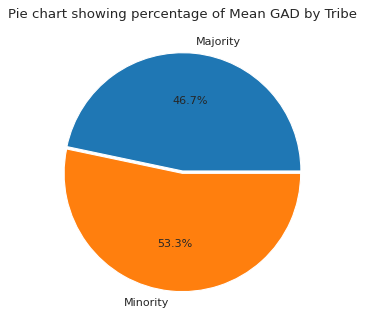

In [14]:
plt.pie(x=mgs_tribe['Mean GAD'],labels=mgs_tribe['Tribe'],explode=[0.01,0.01],autopct='%1.1f%%')
plt.title("Pie chart showing percentage of Mean GAD by Tribe")

In the above visualization it is revealed that the mean GAD scores varied slightly across different tribes, with the Minority group reporting an average GAD percentage of 53.3% greater than the majority which is only 46.7%.

# **ii. Gender**

Text(0.5, 1.0, 'Pie chart showing percentage of Mean GAD by Gender')

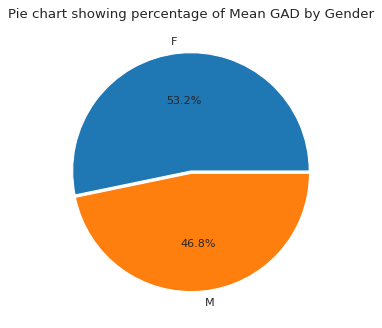

In [15]:
plt.pie(x=mgs_gender['Mean GAD'],labels=mgs_gender['Gender'],explode=[0.01,0.01],autopct='%1.1f%%')
plt.title("Pie chart showing percentage of Mean GAD by Gender")

In the above visualization it is revealed that the mean GAD scores varied across Gender, with the Female gender reporting an average GAD percentage of 53.2% greater than the Male gender which is only 46.8%.

# **iii. School**

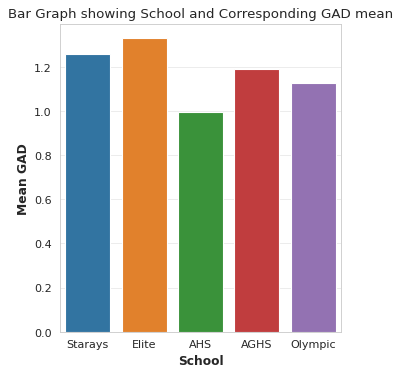

In [16]:
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.title("Bar Graph showing School and Corresponding GAD mean")
sns.barplot(x='School', y='Mean GAD', data=df,ci=None)

plt.xlabel('School', fontweight='bold', fontsize='11', fontfamily='sans-serif')
plt.ylabel('Mean GAD', fontweight='bold', fontsize='11', fontfamily='sans-serif')
plt.grid(axis='x', alpha=0)
plt.grid(axis='y', alpha=0.4);

In the above visualization it is revealed that the mean GAD scores were consistent across different schools,with Elite taking the highest percentage of 22.5% and AHS taking the lowest percentage of 16.9%In the above visualization it is revealed that the mean GAD scores were consistent across different school, With Elite being the highest and AHS being the lowest.

# **iv. Age**

<Axes: xlabel='Age', ylabel='Density'>

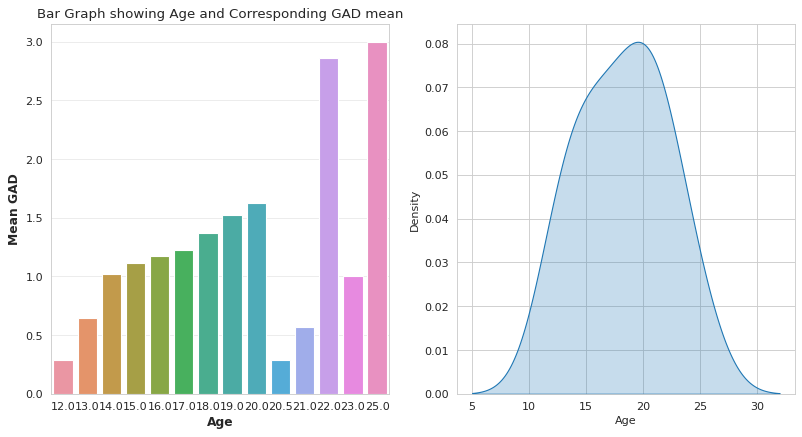

In [17]:
plt.figure(figsize=(12,6))

plt.subplot(1, 2, 1)
plt.title("Bar Graph showing Age and Corresponding GAD mean")
sns.barplot(x='Age', y='Mean GAD', data=df,ci=None)
plt.xlabel('Age', fontweight='bold', fontsize='11', fontfamily='sans-serif')
plt.ylabel('Mean GAD', fontweight='bold', fontsize='11', fontfamily='sans-serif')
plt.grid(axis='x', alpha=0)
plt.grid(axis='y', alpha=0.4)

plt.subplot(1, 2, 2)
sns.kdeplot(data=mgs_age.Age,fill=True)

The Age follows a normal distribution.

In the above visualizations it is revealed that some variation across different age groups, with younger participants (aged 12-17) showing lower mean scores compared to older participants (aged 18-20) and then a drop from (aged 20-21) and having some highly significant scores at the age of (22 and 25).